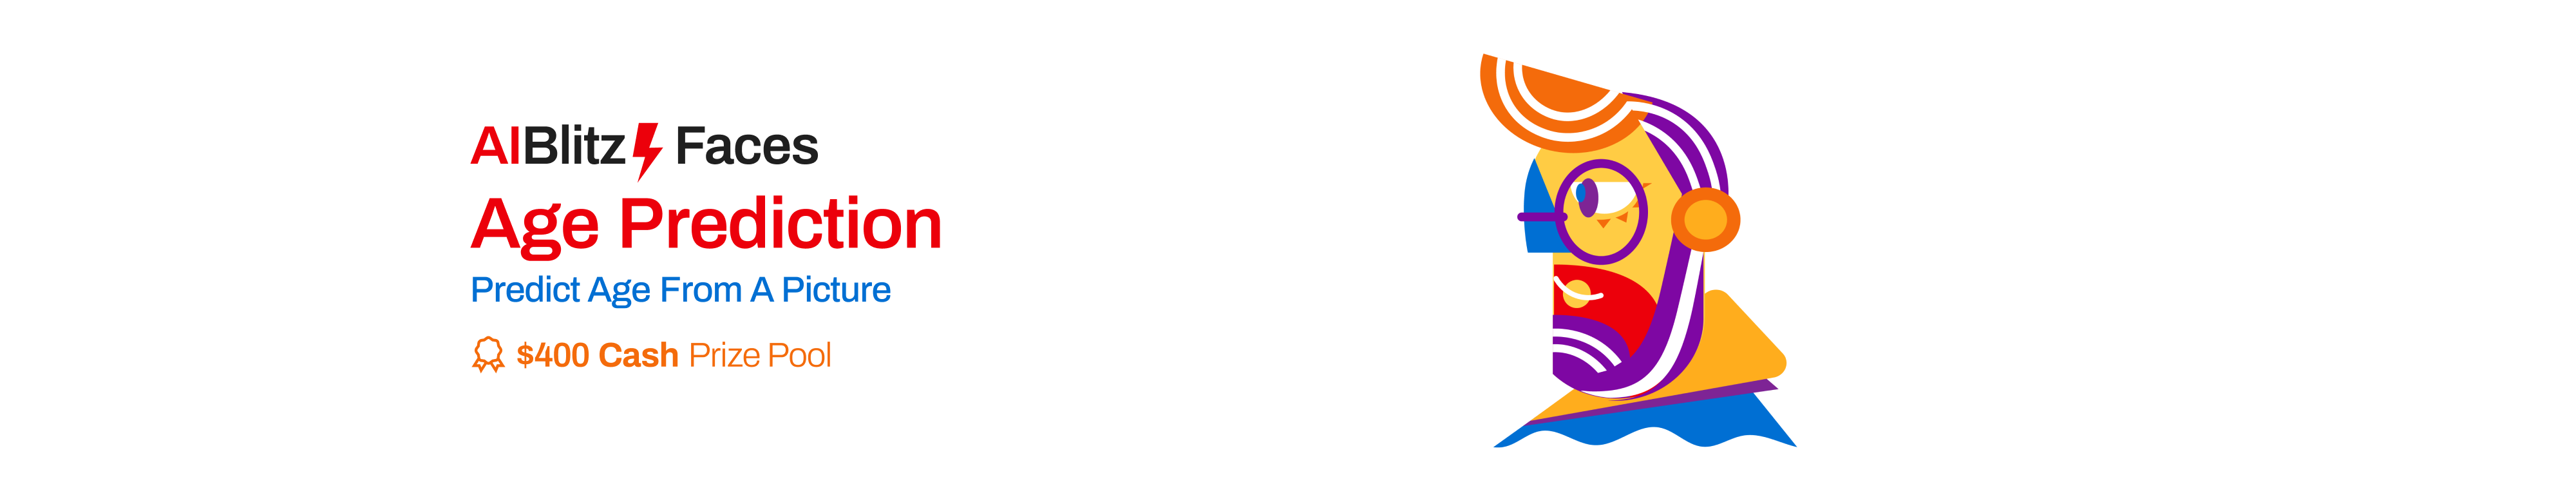

<h2><center> Getting Started with Age Prediction</center></h2>

In this puzzle, we have to predict the age from the given human faces.

This is a starter kit explaining how to download the data and also submit direcly via this notebook. 

In this baseline, we are going to reduce the number of pixels, take them out in a list, and are going to use a random forest classifier model.






# Download the files 💾¶
## Download AIcrowd CLI

We will first install aicrowd-cli which will help you download and later make submission directly via the notebook.


In [1]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

     |████████████████████████████████| 48 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 9.7 MB/s 
     |████████████████████████████████| 170 kB 64.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 214 kB 47.3 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 51 kB 6.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have


## Login to AIcrowd ㊗¶


In [2]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/Yp-R9CnuHDOklXbF8VxyuIwc_MMPmr_QrKcK2bUoOAg
API Key valid
Gitlab access token valid
Saved details successfully!



## Download Dataset¶

We will create a folder name data and download the files there.


In [3]:
import os
os.getcwd()

'/content'

In [4]:
!mkdir data
%aicrowd ds dl -c age-prediction -o data

sample_submission.csv:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/36.0k [00:00<?, ?B/s]

test.zip:   0%|          | 0.00/176M [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/236M [00:00<?, ?B/s]

val.csv:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

val.zip:   0%|          | 0.00/117M [00:00<?, ?B/s]

In [5]:
!unzip data/train.zip -d data/train > /dev/null
!unzip data/val.zip -d data/val > /dev/null
!unzip data/test.zip -d data/test > /dev/null

## Importing Libraries:

In [6]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

## Diving in the dataset 🕵️‍♂️

In [7]:
train_df = pd.read_csv("data/train.csv")
val_df = pd.read_csv("data/val.csv")
test_df = pd.read_csv("data/sample_submission.csv")

In [8]:
print(train_df.head(3))

  ImageID     age
0   93vu1   30-40
1   yjifi   80-90
2   ldd2k  90-100


The number of datapoints in train is 4000
The number of datapoints in valid is 2000
The number of datapoints in test is 3000

In [9]:
print(train_df.shape[0])
print(val_df.shape[0])
print(test_df.shape[0])

4000
2000
3000


The target labels are '0-10' to '90-100'. So there are 10 target labels.

In [10]:
train_df.age.unique()

array(['30-40', '80-90', '90-100', '40-50', '0-10', '60-70', '70-80',
       '20-30', '50-60', '10-20'], dtype=object)

In [11]:
train_df['ImageID'][0]

'93vu1'

## Modeling
We are going to use a very naive approach here.

We will be reducing the number of pixels, take them out in a list, and then use a random forest classifier model.

In [12]:
def preprocessor(image_path,dataframe):
  # Go through each test image
  imgdatas = []
  for i in tqdm(range(dataframe.shape[0]), total = len(dataframe)):
    # Reading the test image
    imgdata = Image.open(os.path.join(image_path, dataframe['ImageID'][i]+'.jpg'))

    #Convert to grayscale
    imgdata = imgdata.convert('L')

    #Reshapes the image to a fix sahpe -> 190×190(You can choose any shape)
    imgdata = imgdata.resize((190,190))
    imgdata =np.asarray(imgdata)

    #Squeezes the matrix for feeding the value to model
    imgdata = np.squeeze(imgdata[10,:])

    imgdatas.append(imgdata)
  # image_ids.append(test_imgs[i].split(".")[0])
  dataframe['imgData'] = imgdatas
  return dataframe

In [13]:
base_path = 'data'
preprocessor(os.path.join(base_path,'train'), train_df)
preprocessor(os.path.join(base_path,'test'), test_df)
preprocessor(os.path.join(base_path,'val'), val_df)

100%|██████████| 2000/2000 [00:14<00:00, 135.74it/s]


ImageID     age                                            imgData
0      444vl   40-50  [60, 56, 55, 53, 52, 53, 52, 53, 52, 51, 50, 5...
1      4eg4u   80-90  [77, 77, 76, 76, 75, 74, 75, 76, 74, 74, 73, 7...
2      8pk8y   40-50  [125, 123, 124, 125, 124, 125, 126, 127, 128, ...
3      qow33  90-100  [76, 76, 77, 78, 78, 79, 81, 83, 83, 84, 85, 8...
4      7ittd   20-30  [77, 76, 75, 73, 72, 72, 71, 70, 69, 67, 66, 6...
...      ...     ...                                                ...
1995   0od5t    0-10  [106, 105, 104, 101, 99, 98, 97, 96, 93, 92, 9...
1996   do352   80-90  [74, 72, 68, 67, 65, 65, 64, 64, 65, 66, 68, 7...
1997   m58bc  90-100  [157, 158, 160, 163, 165, 166, 170, 172, 174, ...
1998   6xxax   50-60  [118, 114, 111, 109, 107, 105, 103, 101, 100, ...
1999   vd7h5   40-50  [126, 126, 127, 128, 127, 127, 126, 127, 125, ...

[2000 rows x 3 columns]

In [14]:
train_df['imgData'][12].shape

(190,)

In [15]:
train_x = train_df.imgData
train_y = train_df.age

In [16]:
age_predictor = RandomForestClassifier(max_features=0.15, random_state=2)
age_predictor.fit(list(train_x),train_y)

RandomForestClassifier(max_features=0.15, random_state=2)

In [17]:
print(age_predictor.score(list(train_x),train_y))

1.0


In [18]:
val_x = val_df.imgData
val_y = val_df.age

In [19]:
val_predict = age_predictor.predict(list(val_x))

In [20]:
print(f1_score(val_predict,val_y,average='weighted'))

0.21341366743272625


## Generating Prediction File
Now that we have created the baseline prediction, lets submit it.

In [21]:
test_x = test_df.imgData
test_predict = age_predictor.predict(list(test_x))

In [22]:
submission = pd.read_csv('data/sample_submission.csv')

In [23]:
submission['age'] = test_predict

In [24]:
!rm -rf assets
!mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"))


# Submitting our Predictions

Note : Please save the notebook before submitting it (Ctrl + S)


In [25]:
%aicrowd notebook submit -c age-prediction -a assets --no-verify

Using notebook: getting-started-notebook-for-age-prediction.ipynb for submission...
Scrubbing API keys from the notebook...


Output()

╭─────────────────────────╮                                                  
                                                  │ Successfully submitted! │                                                  
                                                  ╰─────────────────────────╯

                                                        Important links                                                        
┌──────────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/age-prediction/submissions/172684              │
│                  │                                                                                                          │
│  All submissions │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/age-prediction/submissions?my_submissions=true │
│                  │                                                                                                          │
│      Leaderboard │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/age-prediction/leaderboards                    │
│                  │                                                                                                          │
│ Discussion forum │ https://discourse.aicrowd.com/c/ai-blitz-xiii                                                            │
│                  │                                                                                                          │
│   Challenge page │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/age-prediction                                 │
└──────────────────┴──────────────────────────────────────────────────────────────────────────────────────────────────────────┘